# TensorFlow Speech Recognition Challenge

### Build an algorithm that understands simple speech commands.

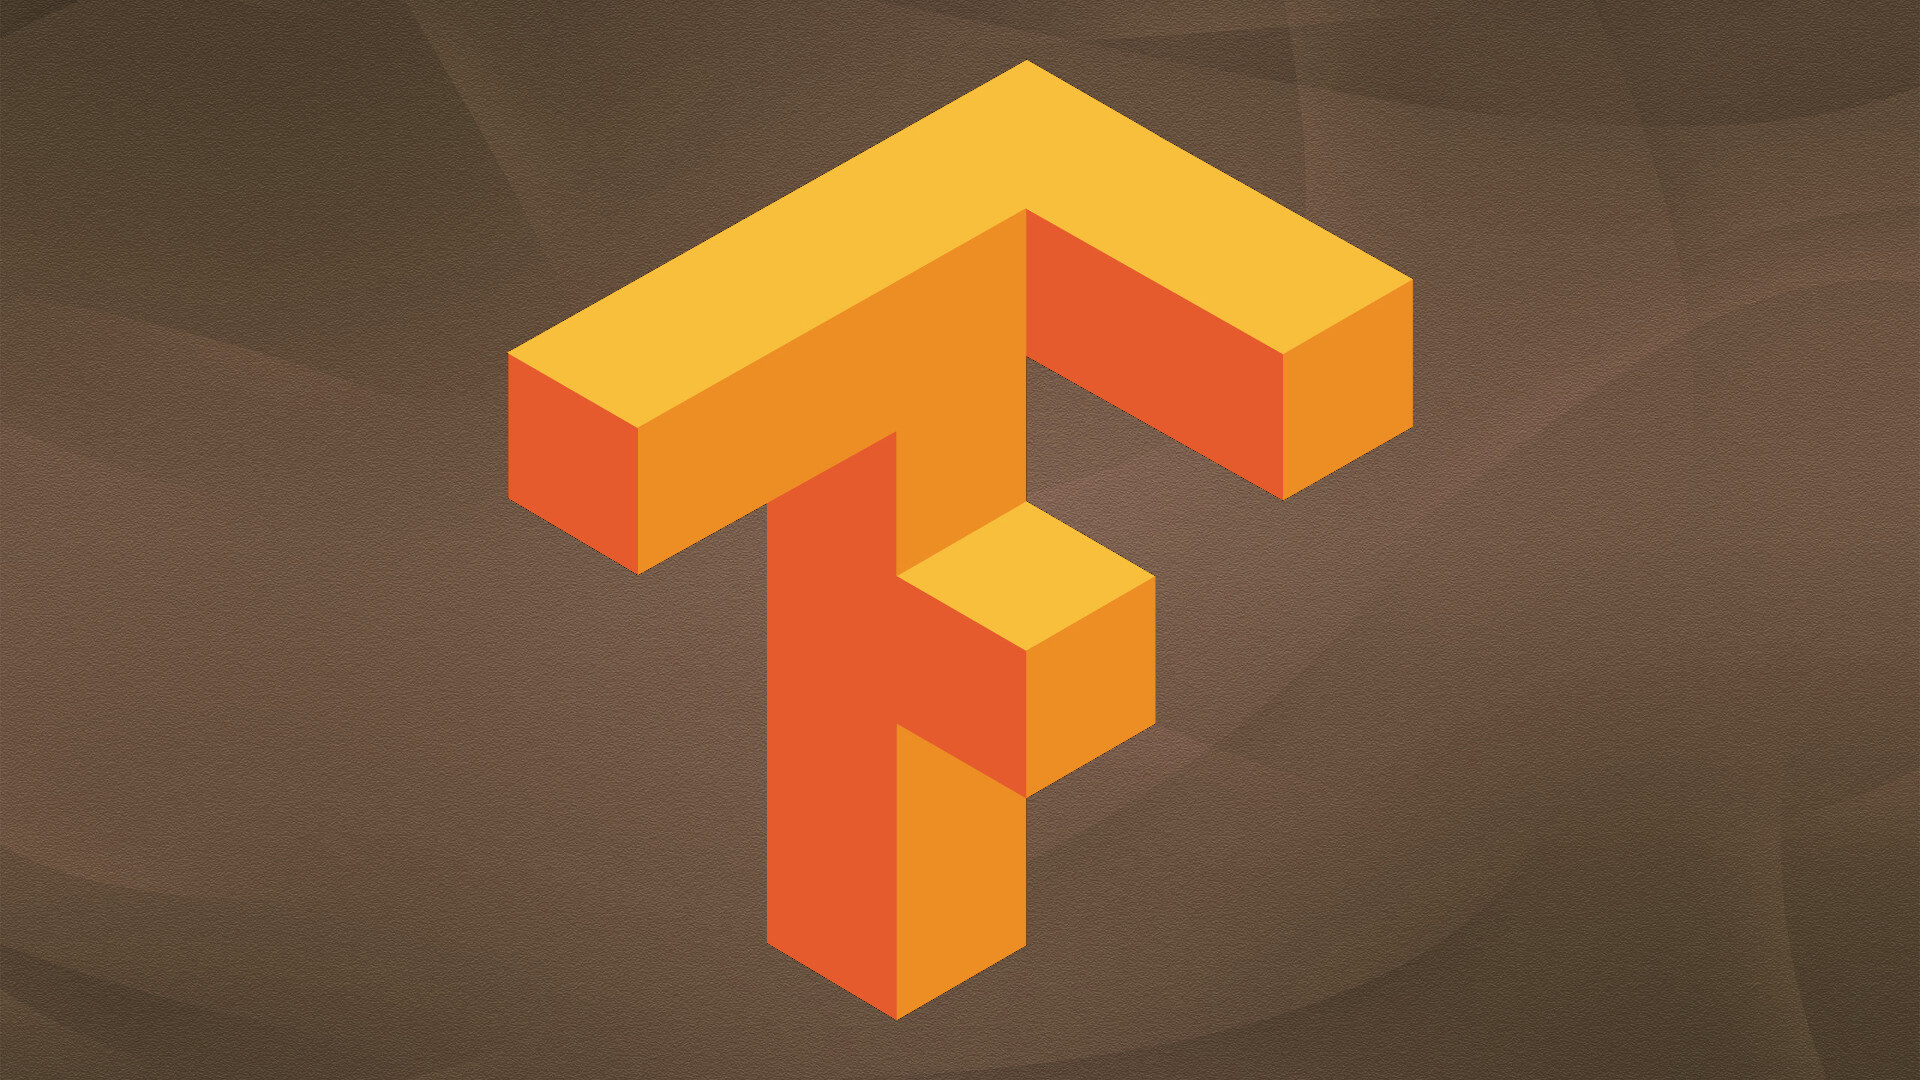

## Problem Statement.

you're challenged to use the Speech Commands Dataset to build an algorithm that understands simple spoken commands. By improving the recognition accuracy of open-sourced voice interface tools, we can improve product effectiveness and their accessibility.

## Importing the general libraries.

In [1]:

import numpy as np
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))       

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


##  Installation

**Pyunpack** is a Python library used to extract various archive formats such as zip, tar, and rar. It is a wrapper around various unpacking libraries like patool, zipFile, and rarfile, and allows you to extract files from archives with a simple API.

**Py7zr** is a Python library used to extract and compress 7zip archive files. It is a pure Python implementation of the 7zip compression algorithm, and it provides an easy-to-use API to work with 7zip archives.

In [2]:
!pip install pyunpack
!pip install patool
!pip install py7zr

     |████████████████████████████████| 77 kB 319 kB/s 
     |████████████████████████████████| 4.9 MB 268 kB/s 
  Installing build dependencies ... - \ | / - \ | / - \ | / done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... - \ | / - done
     |████████████████████████████████| 131 kB 54.4 MB/s 
     |████████████████████████████████| 2.4 MB 57.9 MB/s 
     |████████████████████████████████| 357 kB 28.0 MB/s 
     |████████████████████████████████| 2.0 MB 46.8 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 59 kB 5.7 MB/s 
  Created wheel for py7zr: filename=py7zr-0.18.9-py3-none-any.whl size=64933 sha256=45e91c76d81772ccde0fea21e63c8a24448c46f634a5bcfa3d7fd1d5590caded
  Stored in directory: /root/.cache/pip/wheels/a7/ce/25/7181dbeffbdb3d6b97a37f02deafdddcaa7ec6d5a5c7b0cabc
Successfully built py7zr


### Extracting the file 

**unpack_7zarchive** function from the py7zr library. This function can be used to unpack 7z archives

**shutil.register_unpack_format** method is called to register the 7zip format with the extension .

**shutil.unpack_archive** method is called to unpack the train.7z file to the directory

In [3]:
from py7zr import unpack_7zarchive
import shutil

shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z', '/kaggle/working/tensorflow-speech-recognition-challenge/train/')

### Importing the data from kaggle.


In [4]:
# from pyunpack import Archive
# import shutil
# if not os.path.exists('/kaggle/working/tensorflow-speech-recognition-challenge/train/'):
#     os.makedirs('/kaggle/working/tensorflow-speech-recognition-challenge/train/')
# Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/tensorflow-speech-recognition-challenge/train/')

for dirname, _, filenames in os.walk('/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio'):
    for filename in filename[:5]:
        print(os.path.join(dirname, filename))

/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/t
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/r
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/a
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/i
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/marvin/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/two/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/bird/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/left/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/one/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/cat/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/stop/n
/kaggle/working/tensorflow-speech-recognition-challeng

## **Import the libraries**

Importing the necessary libraries into the notebook.

Librosa and SciPy are the Python libraries used for processing audio signals.

In [5]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

## **Data Exploration and Visualization**

Data Exploration and Visualization helps us to understand the data as well as pre-processing steps in a better way. 



In [6]:
train_audio_path = '/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/'

### **Visualization of Audio signal in time series domain**

Now, we’ll visualize the audio signal in the time series domain:

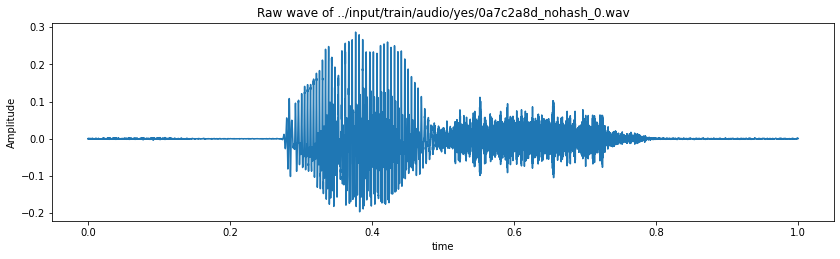

In [7]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

### Outline of the above signal

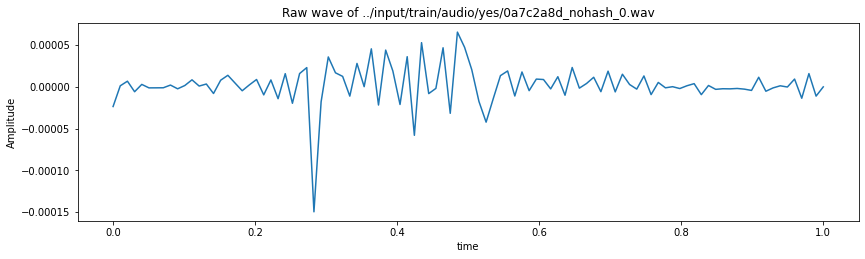

In [8]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

### **Loading an audio file**

Sampling  the rate of the audio signals

The librosa.load() function is used to load the audio file. The sr parameter is the sample_rate, which means that the audio file will be resampled to a sampling rate of 40000 Hz.

Here,the audio file is located in the yes folder, the ipd.Audio() function is used to play back the audio data. 

In [9]:
sample_rate=40000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

**Resampling the a sampling rate to 16000 Hz.**

will see what happens if we keep on decreasing the count of sampling rate. 

In [10]:
sample_rate=16000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

**Resampling the a sampling rate to 6000 Hz.**

In [11]:
sample_rate=6000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

**Resampling the a sampling rate to 3000 Hz.**

In [12]:
sample_rate=3000
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

### **Resampling- Observation**

From above, we can understand that the sampling rate of the signal is 16000 hz. Let us resample it to 8000 hz since most of the speech related frequencies are present in 8000z 

In [13]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [14]:
labels=os.listdir(train_audio_path)

### Counting label

Create a list no_of_recordings that contains the number of recordings for each label in the labels list.

The os.listdir() function is used to list all the files in the directory train_audio_path + '/' + label.

The waves list comprehension filters this list to only include files that end with the .wav extension.

At end of the loop, the no_of_recordings list will contain the number of recordings for each label, in the same order as the labels list. This can be useful for analyzing the distribution of the data and identifying potential imbalances.

Now, let’s understand the number of recordings for each voice command:

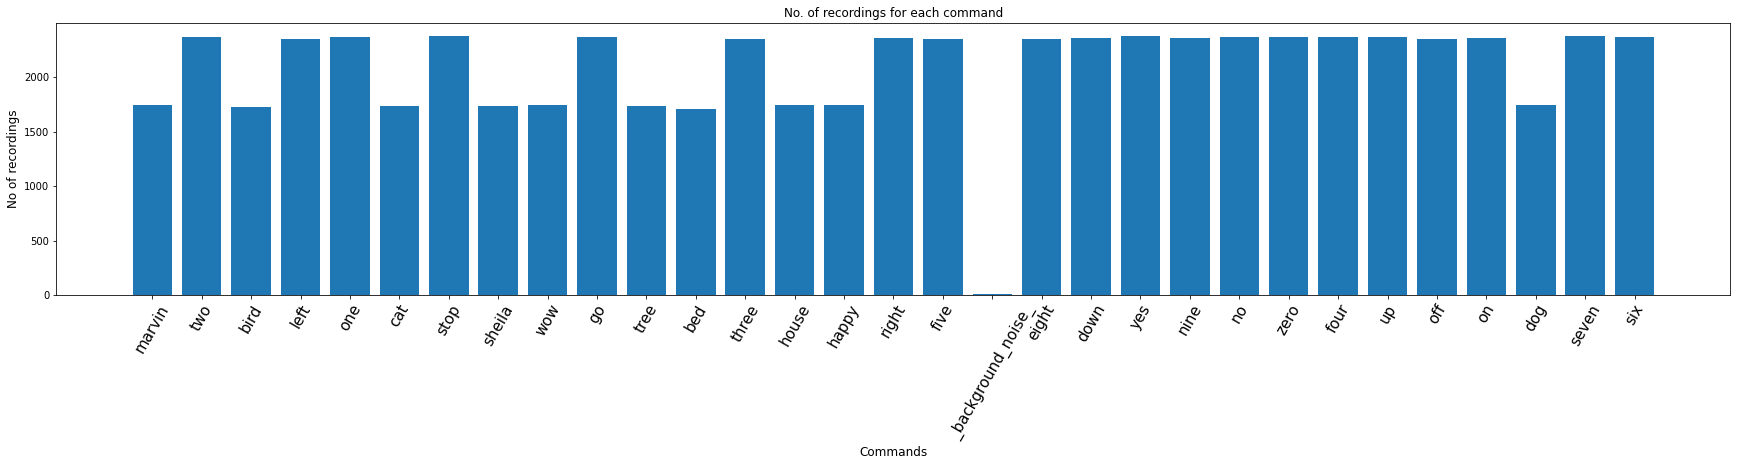

In [15]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [16]:
# labels=["yes", "no","stop", "go"]
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

### **Duration of recordings**

What’s next? A look at the distribution of the duration of recordings:

used to analyze the distribution of recording durations across the different labels, which may help in selecting appropriate models and preprocessing techniques for the data.

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

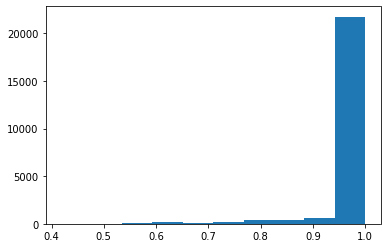

In [17]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

## **Preprocessing the audio waves**

In the data exploration part earlier, we have seen that the duration of a few recordings is less than 1 second and the sampling rate is too high. So, let us read the audio waves and use the below-preprocessing steps to deal with this.

Here are the two steps we’ll follow:

* Resampling
* Removing shorter commands of less than 1 second

Let us define these preprocessing steps in the below code snippet:

In [18]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [19]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
21312


In [20]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

21312
(8000,)


array([-0.00598227, -0.0096927 , -0.00947217, ...,  0.00945565,
        0.00923561,  0.01120665], dtype=float32)

In [21]:
len(set(all_label))

10

### Label Encoder

Convert the output labels to integer encoded:

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [23]:
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

### One hot vector

Now, convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:

**np_utils** module from the Keras deep learning library to convert a target variable y into a one-hot encoded categorical format.

**num_classes** is the number of classes or categories in the dataset. 

In [ ]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Reshaping the array

Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:

In [26]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [27]:
all_wave.shape

(21312, 8000, 1)

### **Split into train and validation set**

Splitting 80% of the data as train and remaining 20% as validation.



In [28]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

### **Model Architecture for this problem**

We will build the speech-to-text model using conv1d. 

Conv1d is a convolutional neural network which performs the convolution along only one dimension. 

### Conv1D, Conv2D and Conv3D : https://xzz201920.medium.com/conv1d-conv2d-and-conv3d-8a59182c4d6

## Importing keras libraries

In [29]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

## Model building- convolution layers

**inputs** is a placeholder tensor representing the input data. It has a shape of (8000, 1)

**Conv1D** is a 1D convolutional layer that applies a set of filters to the input sequence.

**filter** produces a different output sequence by convolving the input with a unique set of weights. These filters learn to detect different patterns or features in the input data.

**kernel_size=13** sets the size of the sliding window that is used for the convolution. 

**Padding** padding mode for the convolution operation. 'valid' means that no padding is applied to the input sequence, so the output sequence is shorter than the input sequence by kernel_size - 1 time steps.

**activation='relu'** sets the activation function used to introduce nonlinearity into the output of the convolution.

**strides=1** which is the step size that the kernel takes as it slides along the input sequence.

**MaxPooling1D** is a pooling layer that reduces the dimensionality of the output sequence from the convolutional layer.
    It takes the maximum value of every pool_size consecutive values of the input sequence, and returns a downsampled sequence with a length of (input_length - pool_size + 1) / strides. 
    In this case, pool_size=3 means that the input sequence is downsampled by a factor of 3, and the output sequence has a length of (8000 - 3 + 1) / 3 = 2666 time steps.
    

**Dropout** is a regularization technique that randomly drops out a fraction of the input units to prevent overfitting. In this case, dropout=0.3 means that 30% of the units in the output of the pooling layer are randomly set to 0 during training.

In [31]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(filters=8,kernel_size=13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

## Model Compliing

Define the loss function to be categorical cross-entropy since it is a multi-classification problem:

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Setting Early stopping and call backs 

Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Let us train the model on a batch size of 32 and evaluate the performance on the holdout set:

In [34]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 12s 9ms/step - loss: 2.2353 - accuracy: 0.1509 - val_loss: 1.7580 - val_accuracy: 0.3528
Epoch 2/100
533/533 [==============================] - 4s 8ms/step - loss: 1.6388 - accuracy: 0.3885 - val_loss: 1.2542 - val_accuracy: 0.5623
Epoch 3/100
533/533 [==============================] - 4s 8ms/step - loss: 1.1554 - accuracy: 0.5830 - val_loss: 0.9335 - val_accuracy: 0.6861
Epoch 4/100
533/533 [==============================] - 4s 8ms/step - loss: 0.9552 - accuracy: 0.6695 - val_loss: 0.8308 - val_accuracy: 0.7277
Epoch 5/100
533/533 [==============================] - 4s 8ms/step - loss: 0.8299 - accuracy: 0.7077 - val_loss: 0.7914 - val_accuracy: 0.7363
Epoch 6/100
533/533 [==============================] - 4s 8ms/step - loss: 0.7694 - accuracy: 0.7320 - val_loss: 0.7089 - val_accuracy: 0.7577
Epoch 7/100
533/533 [==============================] - 4s 8ms/step - loss: 0.6925 - accuracy: 0.7593 - val_loss: 0.6272 - val_accuracy: 0.793

### **Diagnostic plot**

I’m going to lean on visualization again to understand the performance of the model over a period of time:

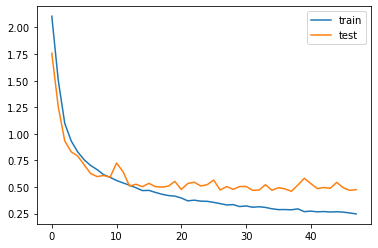

In [35]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### **Loading the best model**

In [36]:
from keras.models import load_model
model.save("SpeechRecogModel.h5")
#model=load_model('/kaggle/working/best_model.hdf5')

## Prediction

Define the function that predicts text for the given audio:

In [37]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

Prediction time! Make predictions on the validation data:

In [38]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: stop


In [39]:
print("Text:",predict(samples))

Text: stop
